In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('spam.tsv' , sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.shape

(5572, 4)

In [7]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [9]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [10]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [11]:
ham=ham.sample(spam.shape[0])

In [12]:
ham=ham.sample(spam.shape[0])
data = pd.concat([ham, spam], ignore_index=True)

In [13]:
data

,label,message,length,punct
0,ham,"Sounds gd... Haha... Can... Wah, u yan jiu so ...",58,13
1,ham,Lil fever:) now fine:),22,4
2,ham,Ok.. Ü finishing soon?,22,3
3,ham,K I'll be sure to get up before noon and see w...,56,2
4,ham,But my family not responding for anything. Now...,154,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [14]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

EDA

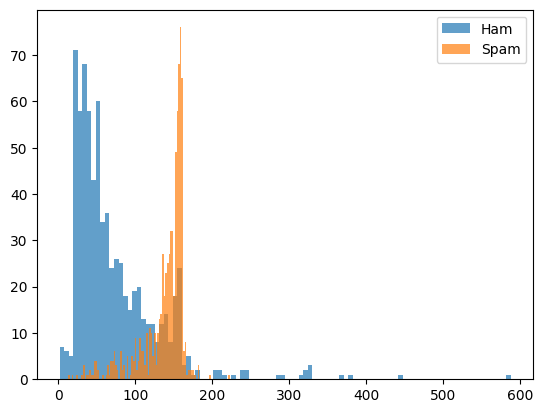

In [15]:
plt.hist(ham['length'] , bins=100 , alpha=0.7, label='Ham')
plt.hist(spam['length'],bins=100 , alpha=0.7 , label='Spam')
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score  , classification_report , confusion_matrix
from sklearn.pipeline import Pipeline

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:
data.head()

,label,message,length,punct
0,ham,"Sounds gd... Haha... Can... Wah, u yan jiu so ...",58,13
1,ham,Lil fever:) now fine:),22,4
2,ham,Ok.. Ü finishing soon?,22,3
3,ham,K I'll be sure to get up before noon and see w...,56,2
4,ham,But my family not responding for anything. Now...,154,3


In [21]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(data['message'])

In [22]:
X=X.toarray()

In [23]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
X.shape

(1494, 4590)

In [25]:
xtrain , xtest , ytrain , ytest = train_test_split(X , data['label'] , random_state=0 , test_size=0.2 , stratify=data['label'])

In [26]:
print(xtrain.shape )
print(xtest.shape )

(1195, 4590)
(299, 4590)


In [27]:
clf=RandomForestClassifier(n_estimators=100 , random_state=0 , n_jobs=-1) 
clf.fit(xtrain , ytrain)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [28]:
ypred=clf.predict(xtest)

In [30]:
accuracy_score(ytest , ypred)

0.9464882943143813

In [31]:
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       150
        spam       1.00      0.89      0.94       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



### SVC

In [52]:
svc=SVC(gamma='auto' , random_state=0 , C=10000 ) 
svc.fit(xtrain , ytrain)

SVC(C=10000, gamma='auto', random_state=0)

In [53]:
ypred_svc=svc.predict(xtest)


In [54]:
accuracy_score(ytest , ypred_svc)

0.9364548494983278

In [55]:
print(classification_report(ytest , ypred_svc))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       150
        spam       0.98      0.89      0.93       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



### Test Model with Real Data

In [68]:
def predict(x):
    x=tfidf.transform([x])
    x=x.toarray()
    pred= clf.predict(x)
    return pred
    
    

In [69]:
predict('I am Shalini')

array(['ham'], dtype=object)

In [72]:
predict('free tests avaible')

array(['ham'], dtype=object)

In [76]:
text = "Hi, this is Cynde from HR. We have a couple questions regarding your application. Please call [number] to schedule an interview."
predict(text)

array(['spam'], dtype=object)